<h1> Assignment 1 <h1>

In [72]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime
import random
import warnings
warnings.filterwarnings('ignore')

<h3> Questions: <h3>
1. Load the dataset provided.

In [73]:
#Importing dataset
df_main = pd.read_csv("energy_generation_train.csv")
df_main

,DateTime,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,2022-08-04 00:15:00,0.0,NaN,NaN,5613.0,2747.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,466.0,79.0,NaN,0.0,70.0,186.0,52.0
1,2022-08-04 00:30:00,0.0,NaN,NaN,5425.0,2742.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,86.0,NaN,0.0,70.0,210.0,62.0
2,2022-08-04 00:45:00,0.0,NaN,NaN,5039.0,2797.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,90.0,NaN,0.0,69.0,233.0,71.0
3,2022-08-04 01:00:00,0.0,NaN,NaN,4661.0,2805.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,92.0,NaN,0.0,69.0,245.0,75.0
4,2022-08-04 01:15:00,0.0,NaN,NaN,3833.0,2789.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,91.0,NaN,0.0,71.0,264.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36862,2023-08-31 22:45:00,0.0,NaN,NaN,8324.0,576.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,470.0,263.0,NaN,0.0,71.0,285.0,26.0
36863,2023-08-31 23:00:00,0.0,NaN,NaN,7930.0,580.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,469.0,267.0,NaN,0.0,72.0,294.0,31.0
36864,2023-08-31 23:15:00,0.0,NaN,NaN,7237.0,582.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,470.0,245.0,NaN,0.0,72.0,290.0,34.0
36865,2023-08-31 23:30:00,0.0,NaN,NaN,6984.0,579.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,470.0,232.0,NaN,0.0,72.0,290.0,35.0


<h5> A. Make sure all columns have the correct data type, e.g., ‘float’ or ‘int’ for numeric quantities, ‘object’ for categorical variables, ‘datetime’ for dates, etc. <h5>

In [74]:
#Type of datatypes in dataframe
df_main.dtypes

DateTime                            object
Biomass                            float64
Fossil Brown coal/Lignite          float64
Fossil Coal-derived gas            float64
Fossil Gas                         float64
Fossil Hard coal                   float64
Fossil Oil                         float64
Fossil Oil shale                   float64
Fossil Peat                        float64
Geothermal                         float64
Hydro Pumped Storage               float64
Hydro Pumped Storage.1             float64
Hydro Run-of-river and poundage    float64
Hydro Water Reservoir              float64
Marine                             float64
Nuclear                            float64
Other                              float64
Other renewable                    float64
Solar                              float64
Waste                              float64
Wind Offshore                      float64
Wind Onshore                       float64
dtype: object

In [75]:
#Changing the datatype of Datetime in the given data
df_main['DateTime'] = pd.to_datetime(df_main['DateTime'])
print(df_main.dtypes)

#Setting Datetime as index
df_main.set_index('DateTime', inplace=True)

DateTime                           datetime64[ns]
Biomass                                   float64
Fossil Brown coal/Lignite                 float64
Fossil Coal-derived gas                   float64
Fossil Gas                                float64
Fossil Hard coal                          float64
Fossil Oil                                float64
Fossil Oil shale                          float64
Fossil Peat                               float64
Geothermal                                float64
Hydro Pumped Storage                      float64
Hydro Pumped Storage.1                    float64
Hydro Run-of-river and poundage           float64
Hydro Water Reservoir                     float64
Marine                                    float64
Nuclear                                   float64
Other                                     float64
Other renewable                           float64
Solar                                     float64
Waste                                     float64


<div class='alert alert-warning' role='alert'> It can seen that the type of DateTime column was initially object and it has been typecasted into datetime64[ns] format</div>

<h5> B. Remove columns where all values are missing or equal to zero. <h5>

In [76]:
#Remove all columns where all columns are missing or equal to zero
df_main = df_main.loc[:,(df_main**2).sum()!=0]
df_main

,Fossil Gas,Fossil Hard coal,Nuclear,Other,Solar,Waste,Wind Offshore,Wind Onshore
DateTime,,,,,,,,
2022-08-04 00:15:00,5613.0,2747.0,466.0,79.0,0.0,70.0,186.0,52.0
2022-08-04 00:30:00,5425.0,2742.0,464.0,86.0,0.0,70.0,210.0,62.0
2022-08-04 00:45:00,5039.0,2797.0,464.0,90.0,0.0,69.0,233.0,71.0
2022-08-04 01:00:00,4661.0,2805.0,464.0,92.0,0.0,69.0,245.0,75.0
2022-08-04 01:15:00,3833.0,2789.0,464.0,91.0,0.0,71.0,264.0,78.0
...,...,...,...,...,...,...,...,...
2023-08-31 22:45:00,8324.0,576.0,470.0,263.0,0.0,71.0,285.0,26.0
2023-08-31 23:00:00,7930.0,580.0,469.0,267.0,0.0,72.0,294.0,31.0
2023-08-31 23:15:00,7237.0,582.0,470.0,245.0,0.0,72.0,290.0,34.0


<div class='alert alert-warning' role='alert'> The dataset has been sliced using the .loc function to select all the rows and only the columns where the sum of square of the column is not equal to zero. In this way we can slice all the columns where there are non-zero values present and completely removes columns with all Nan or zero values. </div>

<h5> C. Describe the basic statistics (mean, minimum, maximum, standard deviation, etc.) of the numerical variables. <h5>

In [77]:
#Describe the basic statistics of the numerical variables
df_main.describe()

,Fossil Gas,Fossil Hard coal,Nuclear,Other,Solar,Waste,Wind Offshore,Wind Onshore
count,36835.000000,36836.000000,36836.000000,36836.000000,36835.000000,36836.000000,36836.000000,36836.000000
mean,3571.961694,1730.064258,438.174096,391.234010,32.581811,60.022098,976.611196,339.830709
std,2186.093062,1138.712661,125.836093,289.482637,54.582763,170.148282,735.942332,288.517783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1651.000000,775.750000,468.000000,142.000000,0.000000,42.000000,320.000000,93.000000
50%,3019.000000,1723.000000,474.000000,336.000000,2.000000,69.000000,813.000000,256.000000
75%,5243.000000,2725.000000,482.000000,585.000000,44.000000,71.000000,1600.000000,535.000000
max,9433.000000,3912.000000,490.000000,1767.000000,252.000000,20405.000000,2883.000000,1136.000000


<div class='alert alert-warning' role='alert'> Fossil gas has the highest mean value for the whole year out of all energy sources denoting it as the major energy source provider out of all the energy sources. But it also has the highest standard deviation highlighting the inconsistency in energy generated.  The maximum value produced on a 15 second duration recorded as of dataset is Waste energy with 20405 MW. All energy has minimum value of 0 indicating either the value is missing or actual shutdown of energy during that particular part of time or measurement error. It could also be noted that only 25% of energy values for Fossil fuels are under 1600 MW and rest 75% of values are above this threshold mark signifying its importance as a major contributor. Solar energy is the lowest contributor for the energy source incomparison with other sources. </div>

<h3> 2. Perform an exploratory data analysis on the data. Use data visualization techniques to detect important patterns. Guarantee that your plots are readable and understandable (annotated with labels, colors, legends, etc.). Answer the following questions based on your analysis of the plots and statistics. Clearly motivate your answers: <h3>

<h5> A. What is the distribution of generated energy per type? Which source accounts for the largest share of generated energy and which one for the smallest? <h5>

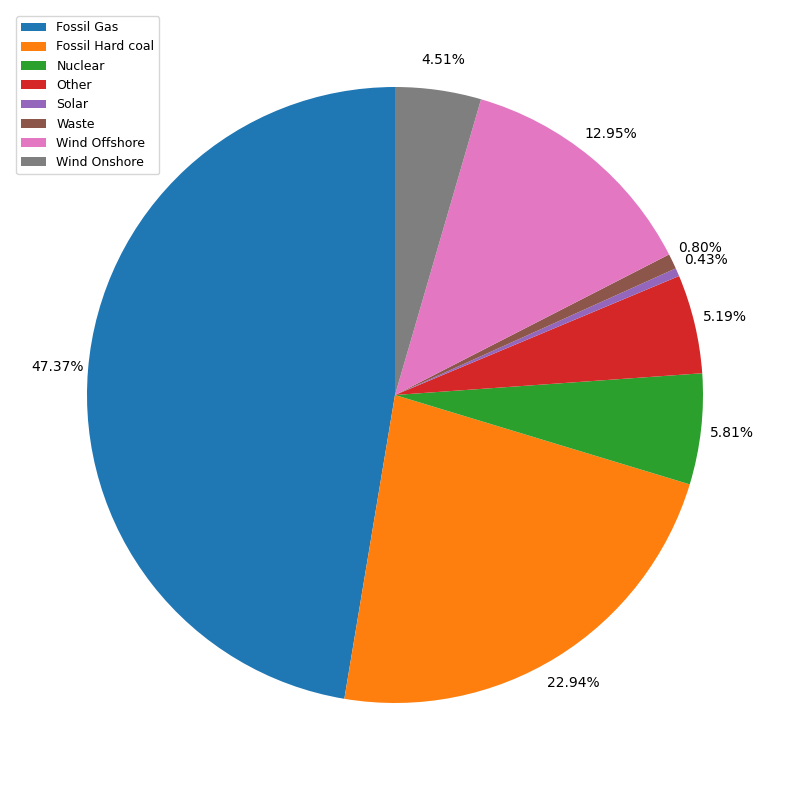

In [78]:
#Distribution of generated energy datatype
aggregate_energy = df_main.aggregate('sum')
labels = df_main.columns
plt.figure(figsize=(15,10))
plt.pie(aggregate_energy, startangle=90, autopct='%1.2f%%',pctdistance=1.1)
plt.legend(labels, fontsize="9", loc ="upper left")
plt.show()

<div class='alert alert-warning' role='alert'> Pie chart is plotted to understand the distribution of generated energy type. It gives a good scale for comparing values directly and get the relevant analysis. From the graph, Fossil Gas accounts for the largest share of generated energy with 47.37 %. The smallest share is contributed by Solar energy with 0.43 % </div>

<h5> B. Are there outliers in the distributions energy generation? Mention methods to correct outliers that can be applied to this dataset. <h5>

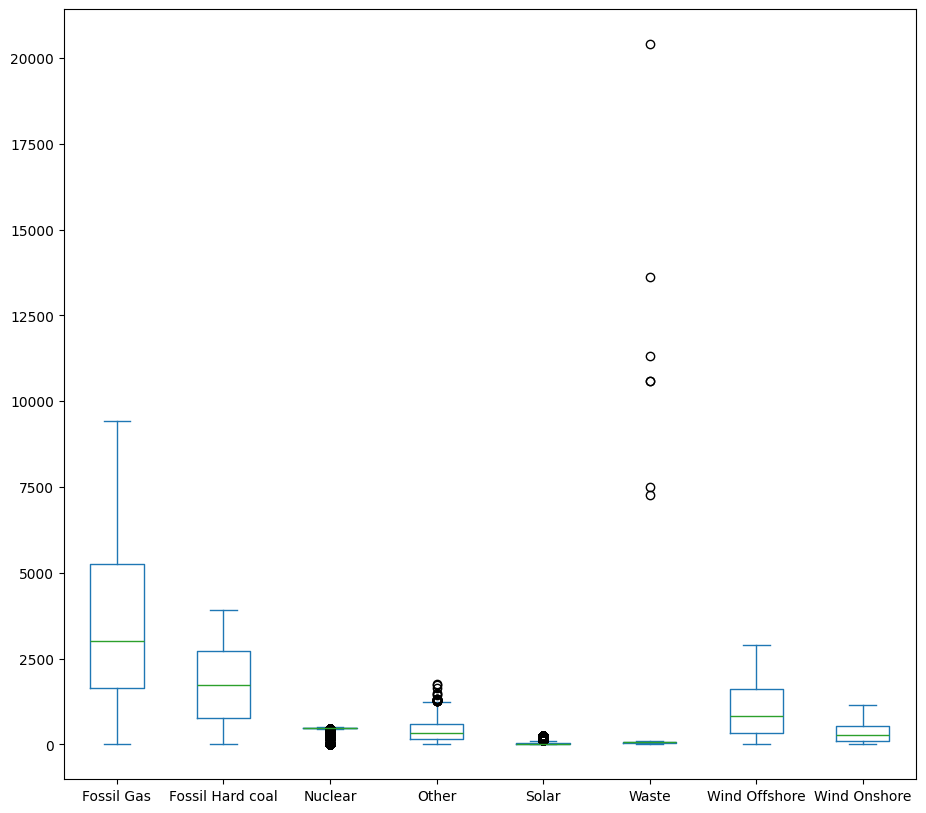

In [79]:
#Detecting outliers
fig = df_main.plot(kind='box',figsize=(11,10))
plt.show()

<div class='alert alert-warning' role='alert'> In a box plot, outliers can be identified based on their position relative to the quartiles of the data. Outliers are defined as data points that fall outside a specified range determined by the interquartile range (IQR). Yes there are outliers in the distributions of energy generation. The energies with outliers are Nuclear, Solar, Waste and Other.  
Correcting outliers involves either removing the outlier data points or transforming them in a way that reduces their impact on the analysis. Here are some common methods are: 

 1. Trimming: Trim the dataset by removing extreme values beyond a certain threshold. This method involves discarding data points that are beyond a certain number of standard deviations from the mean. In the above box plot we could remove data points that are more than 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile.

 2. Winsorization: Winsorization involves replacing extreme values with less extreme values. Instead of removing outliers entirely winsorization replaces them with values closer to the rest of the data.

 3. Transformation: Transforming the data can sometimes make the distribution more symmetric and reduce the impact of outliers. Common transformations include logarithmic, square root, or Box-Cox transformations. These transformations can help stabilize the variance and make the data more suitable for statistical analysis. </div>

<h5> C. How does the generation of energy sources look over different months? Describe the tendencies you can observe. <h5>

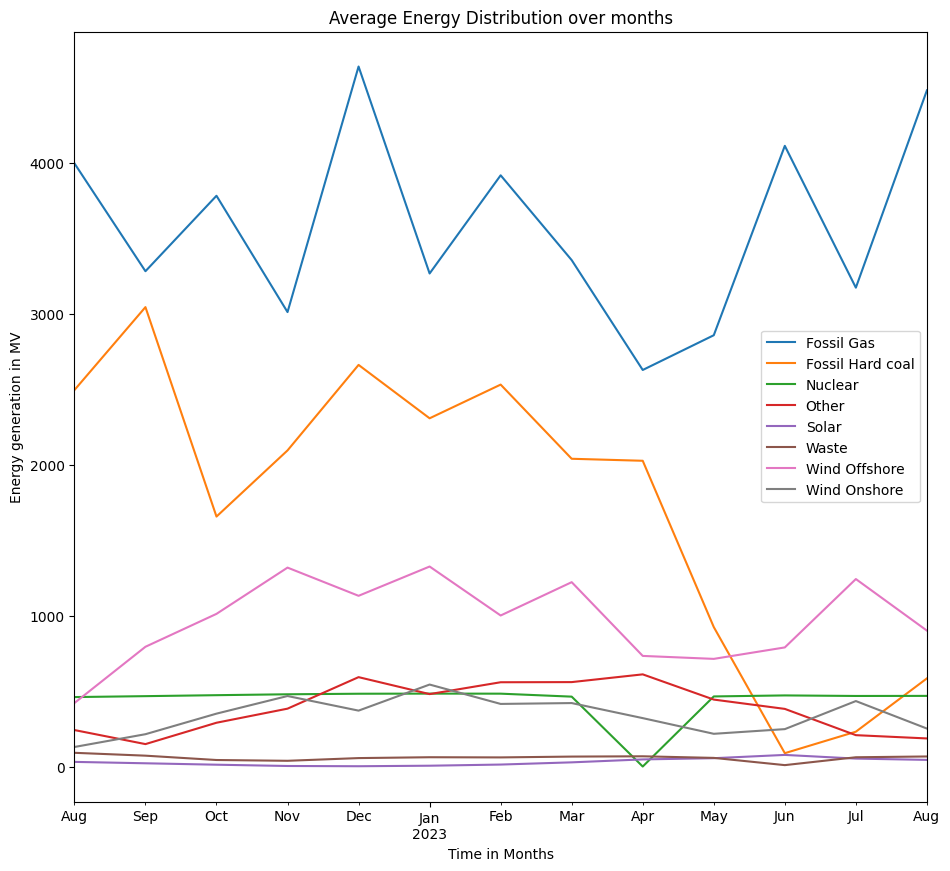

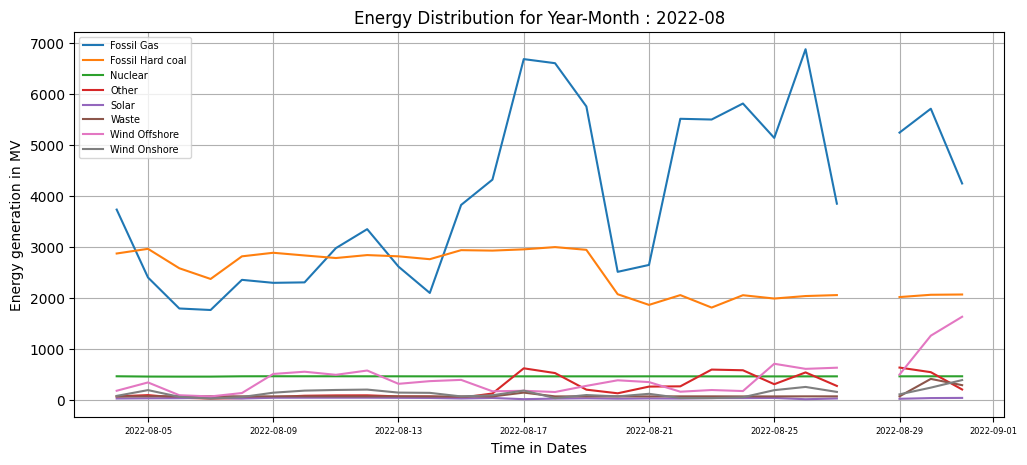

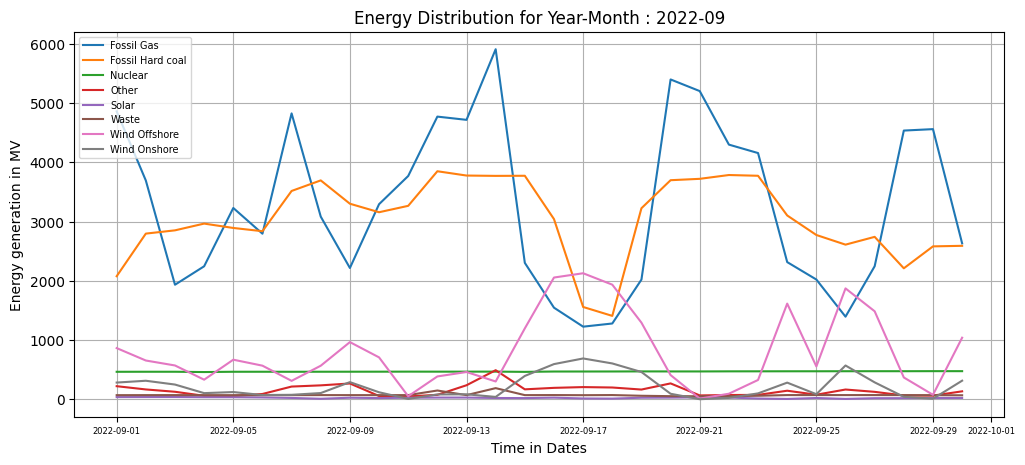

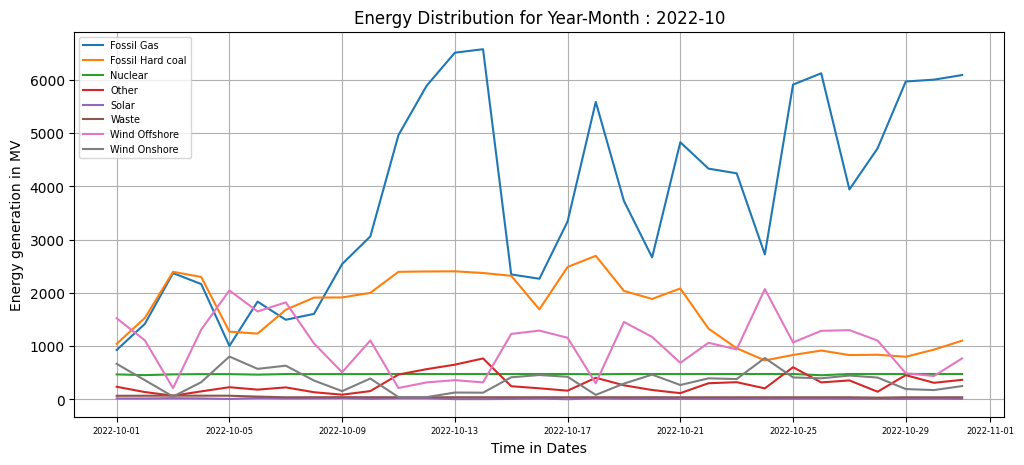

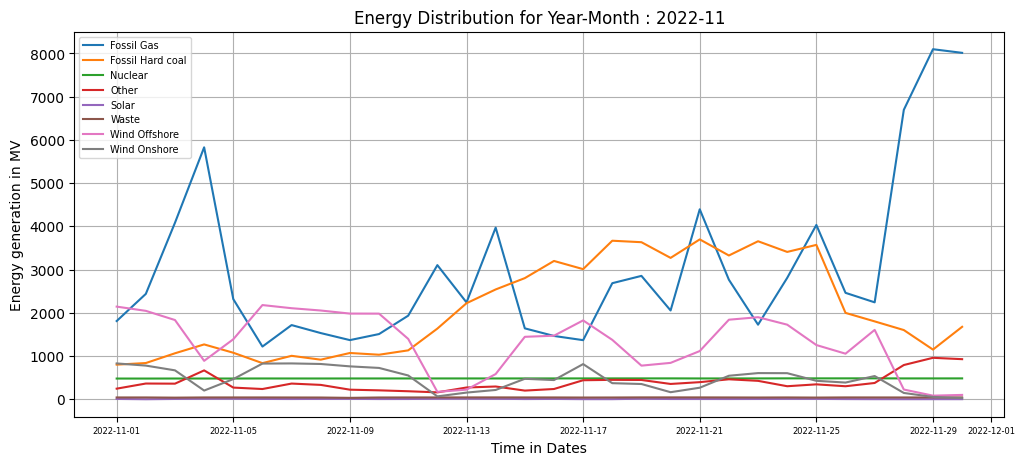

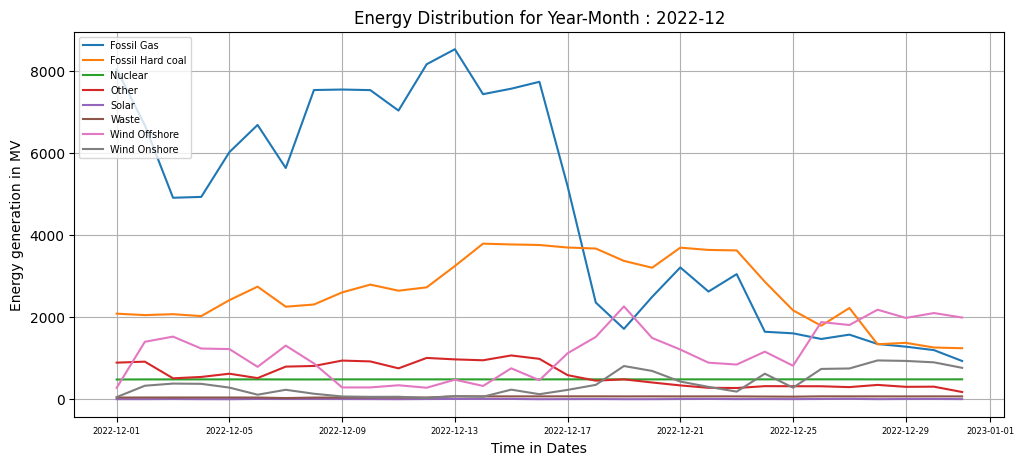

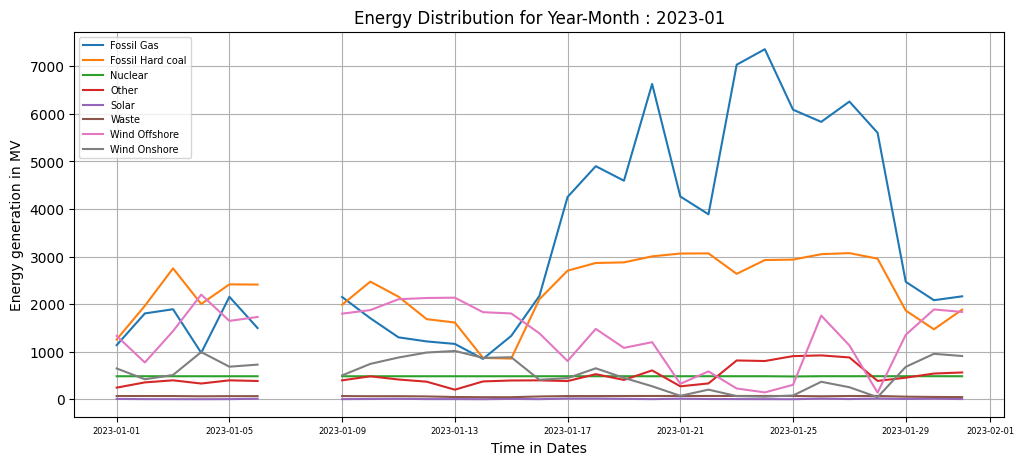

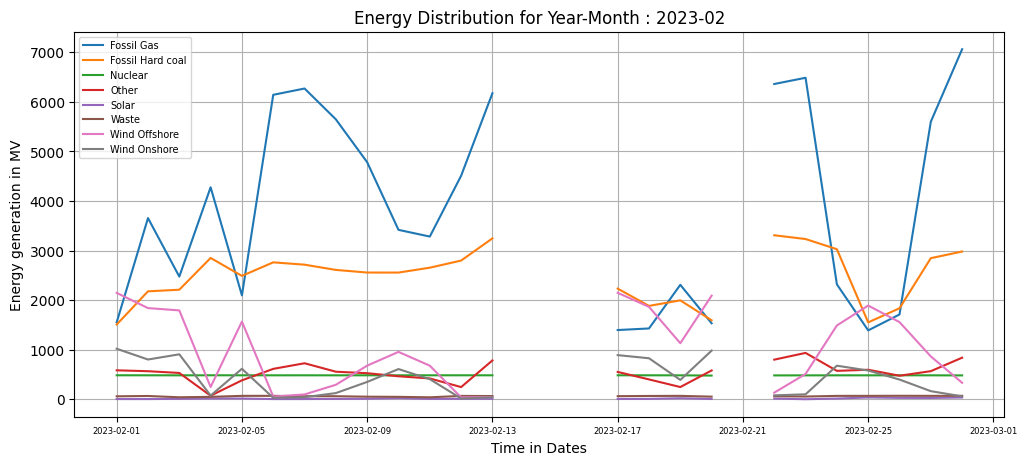

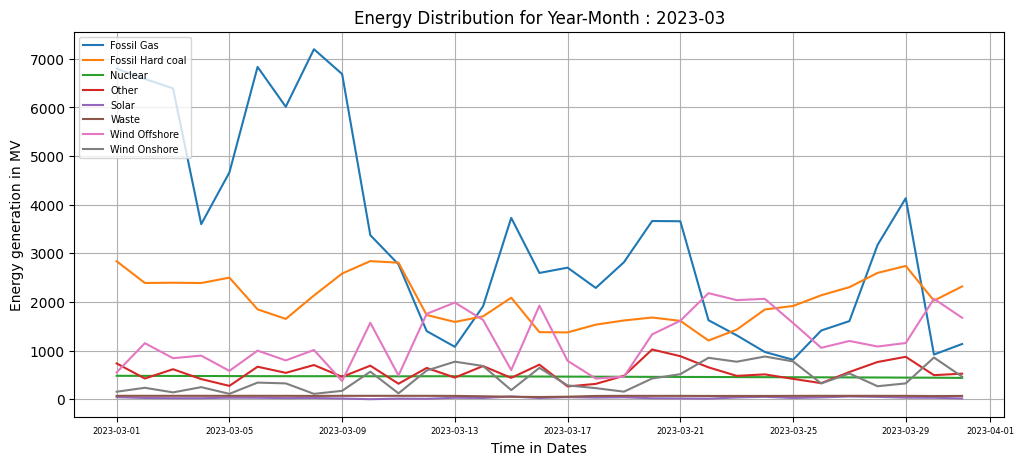

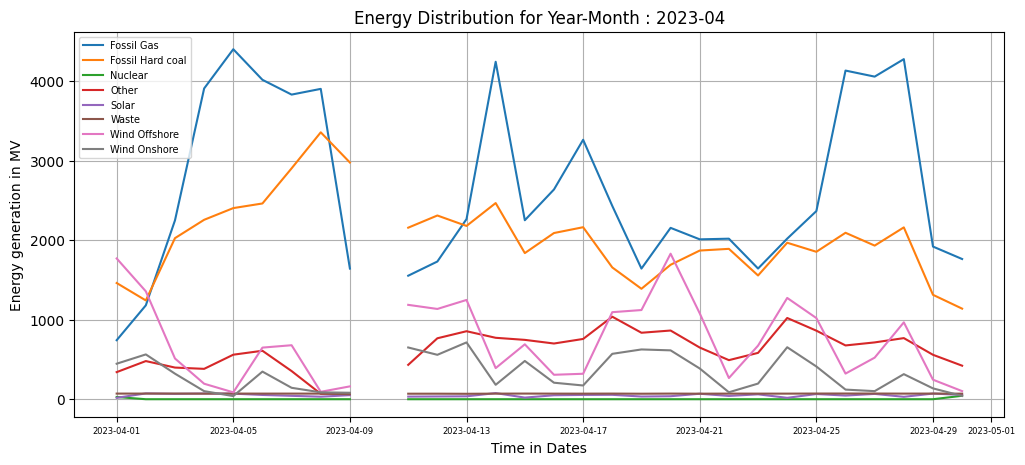

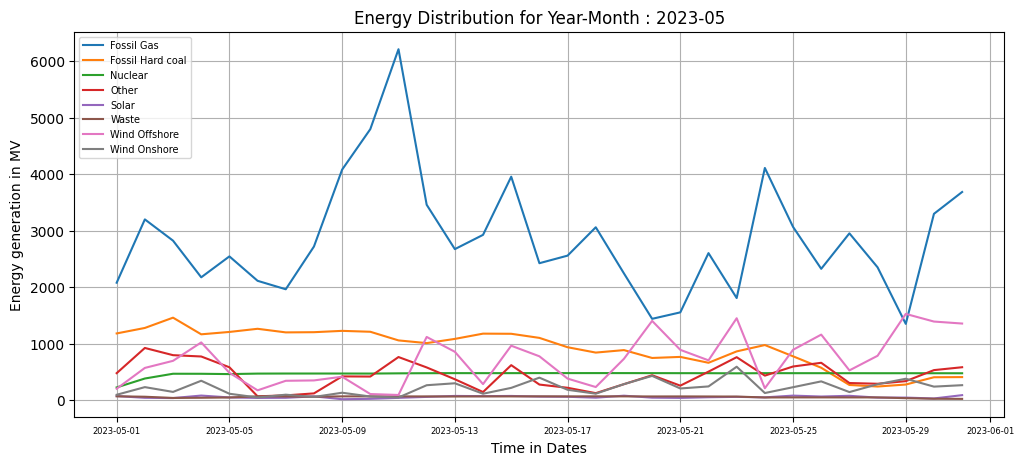

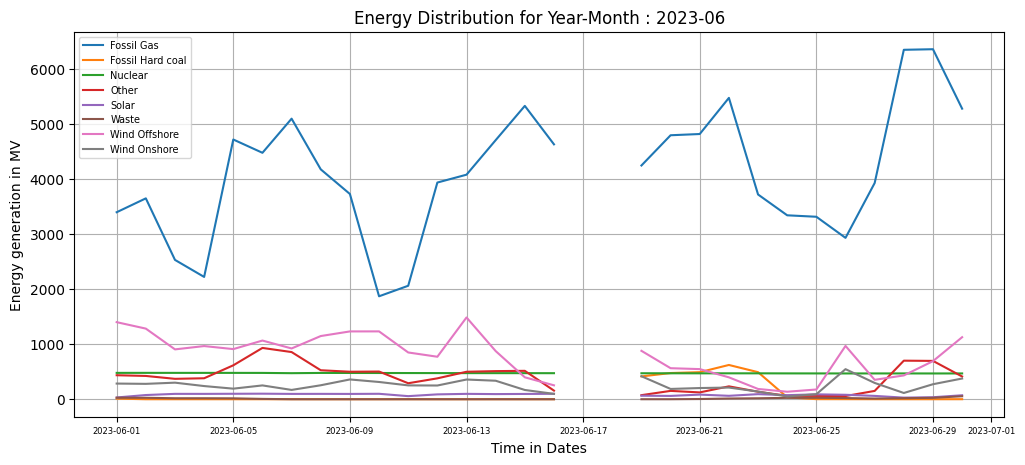

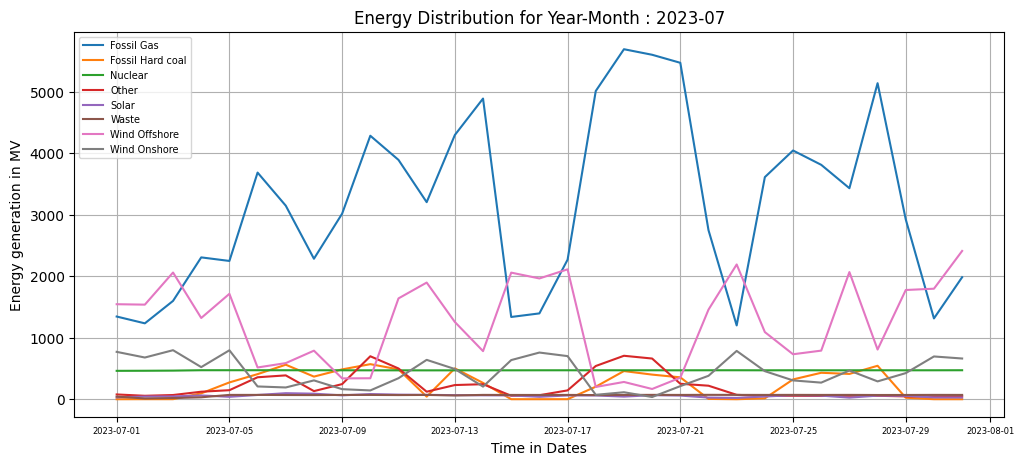

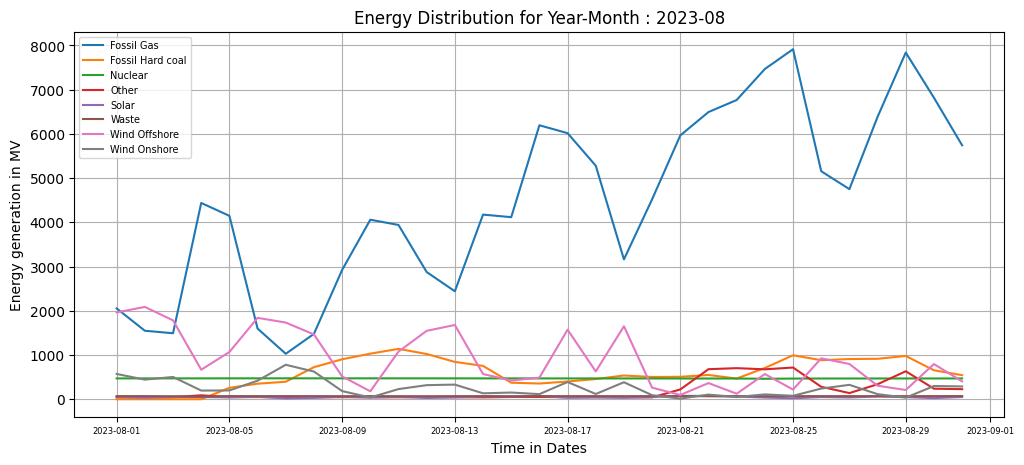

In [80]:
#Plotting energy distribution over months

#Plotting average energy distribution over months
aggregate_month = df_main.resample('M').mean()
fig = aggregate_month.plot(kind='line',figsize=(11,10))
plt.title(f'Average Energy Distribution over months')
plt.xlabel('Time in Months',fontsize = 10)
plt.ylabel('Energy generation in MV')

#Copying data to avoid making changes to main dataframe
df_copy = df_main.copy()

#Creating column for slicing easily
df_copy['Year_month'] = df_copy.index.strftime('%Y-%m')

#Slicing the plotting for all the different months in the dataset
for month in df_copy['Year_month'].unique(): #Loops over unique year-month combination
    plot_data = df_copy[df_copy['Year_month'] == month]
    plot_data.drop(columns=['Year_month'], inplace=True) #Dropped the filtering column to plot the energy values
    plot_data = plot_data.resample('D').mean()
    plt.figure(figsize=(12,5))
    plt.plot(plot_data)
    plt.legend(labels, fontsize="7", loc ="upper left")
    plt.title(f'Energy Distribution for Year-Month : {month}')
    plt.xlabel('Time in Dates',fontsize = 10)
    plt.ylabel('Energy generation in MV')
    plt.tick_params(axis='x', labelsize=6)  # Adjusting the fontsize
    plt.grid(True)
    plt.show()

<div class='alert alert-warning' role='alert'>
The first graph on average energy distribution shows the overall trend of energy generated over the months. Analysis has been mainly derived from the energy distribution over different months. All these analysis can be confirmed using this summarized graph.
Separate plots have been plotted for different months. Data has been resampled to day basis to smoothen the trend. Different energy sources could be categorized based on their trends. Fossil gas, fossil hard coal and Wind offshore exhibit fluctuations over time. However, fossil hard coal experiences in energy generation a notable decrease from May-2023 to August-2023. Nuclear, waste, and solar show relatively stable patterns over time. However, nuclear experiences a almost zero production in April-2023 before returning to its previous level. Onshore and offshore wind follow similar trends, with offshore consistently higher than onshore. The 'Other' category stands out from the rest. There has been a considerate generation in others category starting from Jan-20233 to July-2023. It could also be noticed that more data is missing in the month of Feb-2023</div>

<h5> D. Is the generation of the different energy sources constant during the day? Again, describe the tendencies you can observe. <h5>

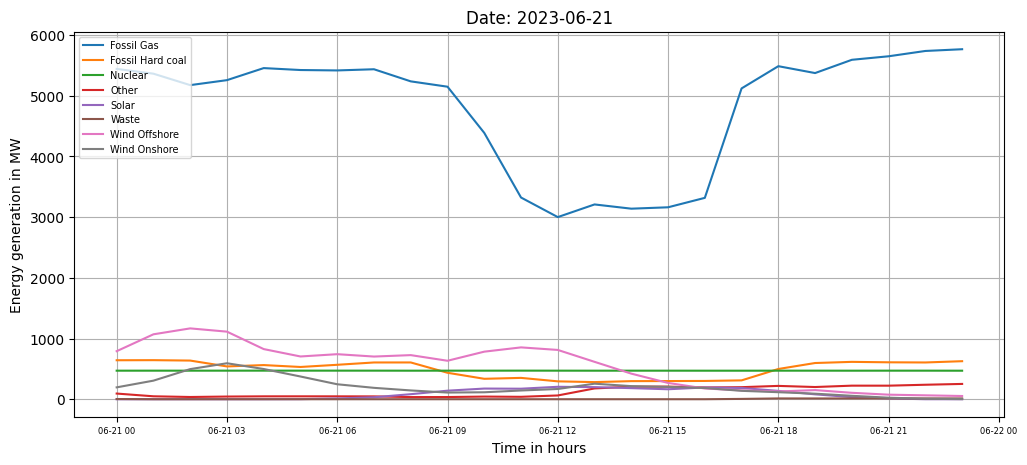

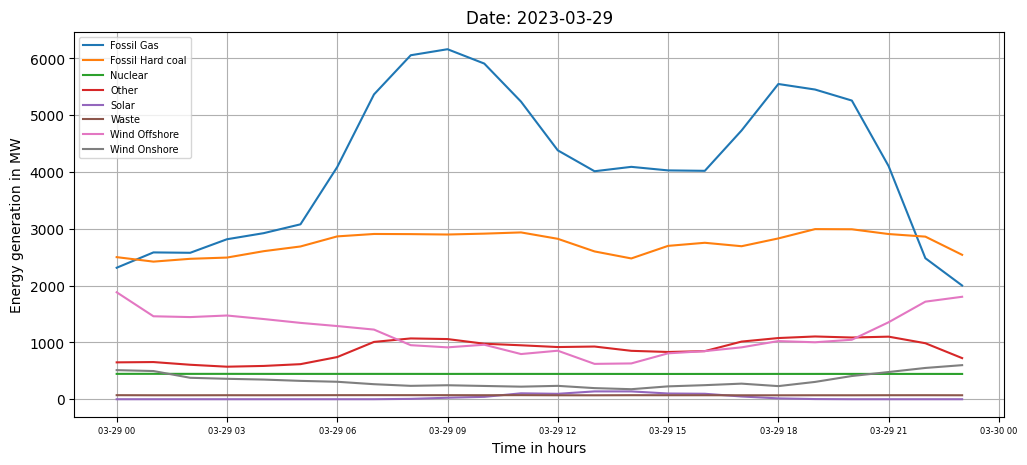

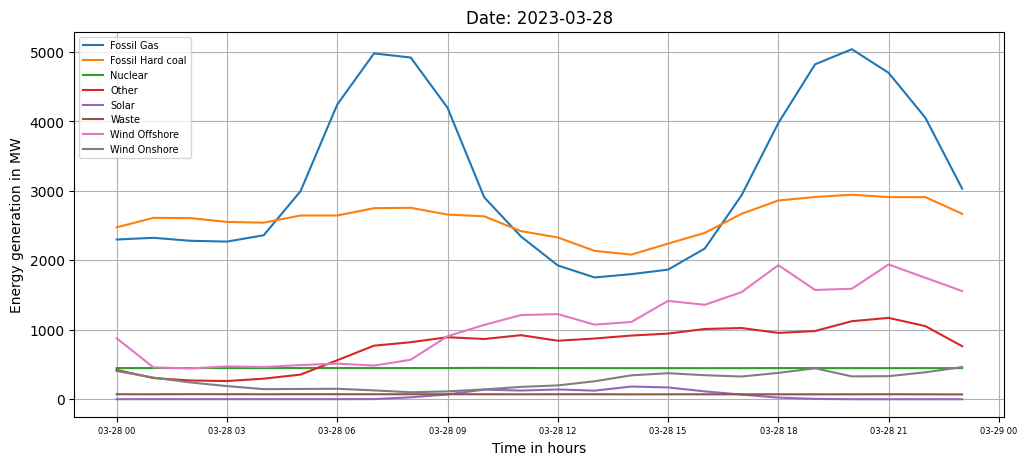

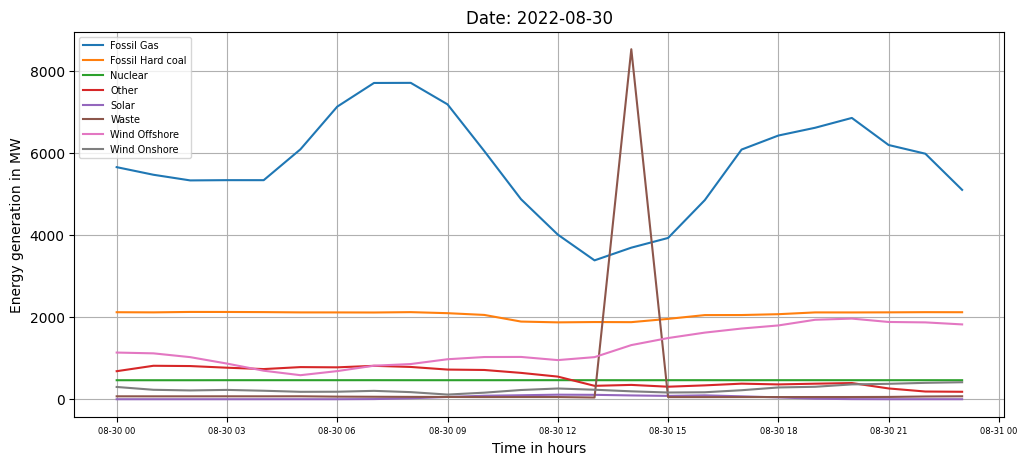

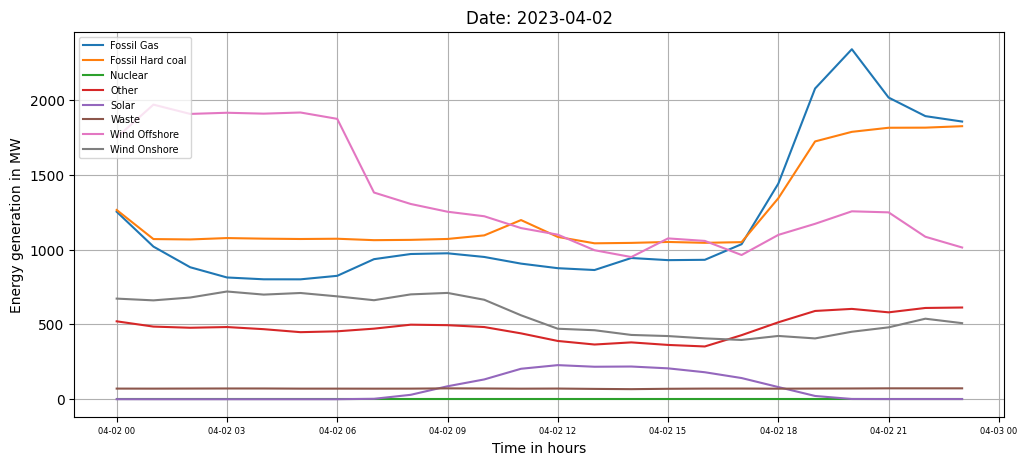

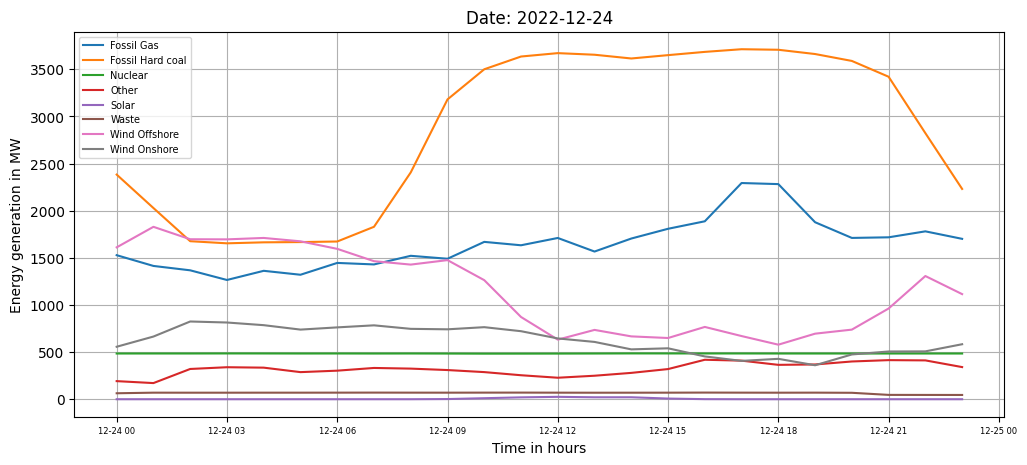

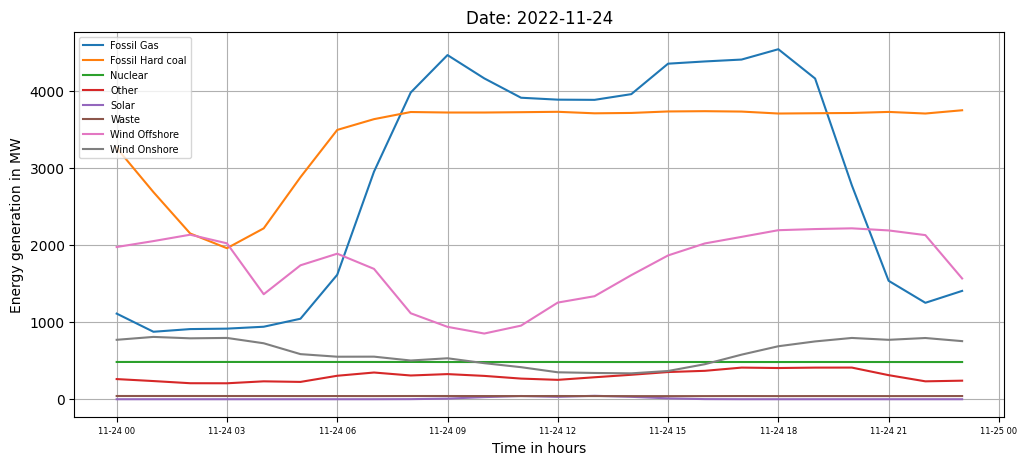

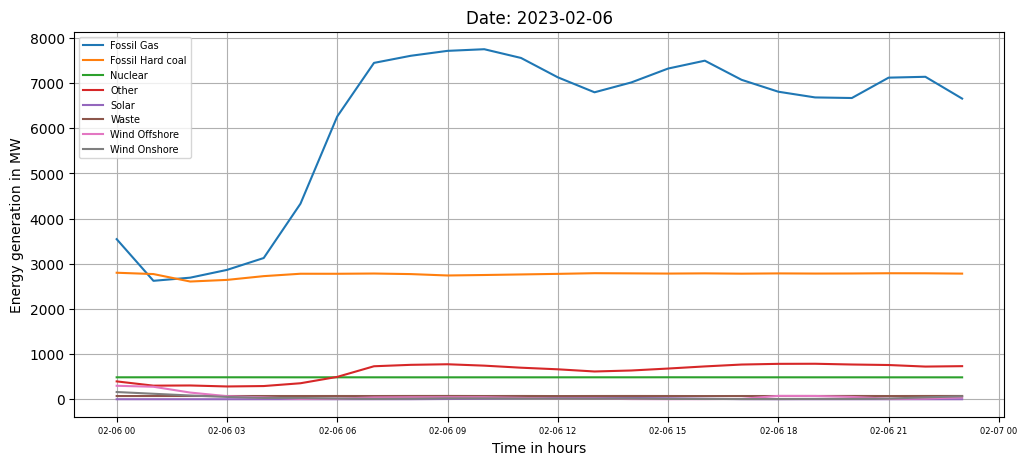

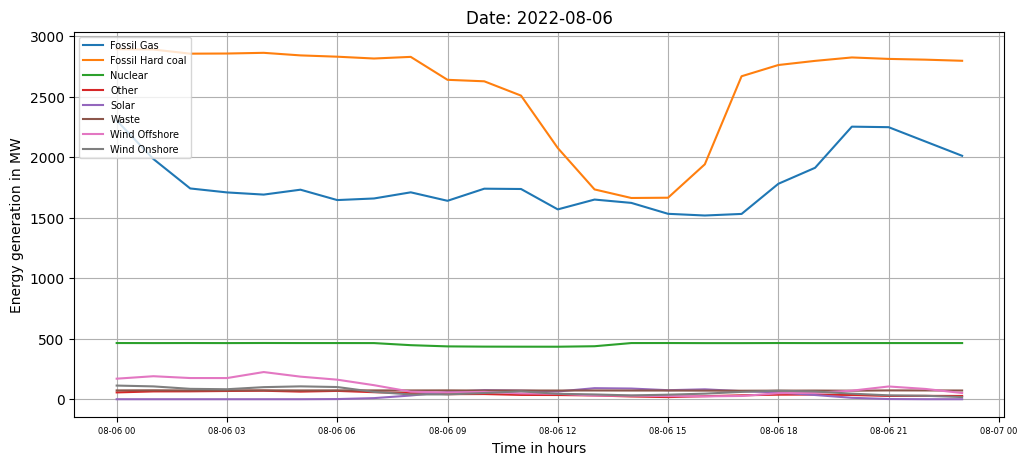

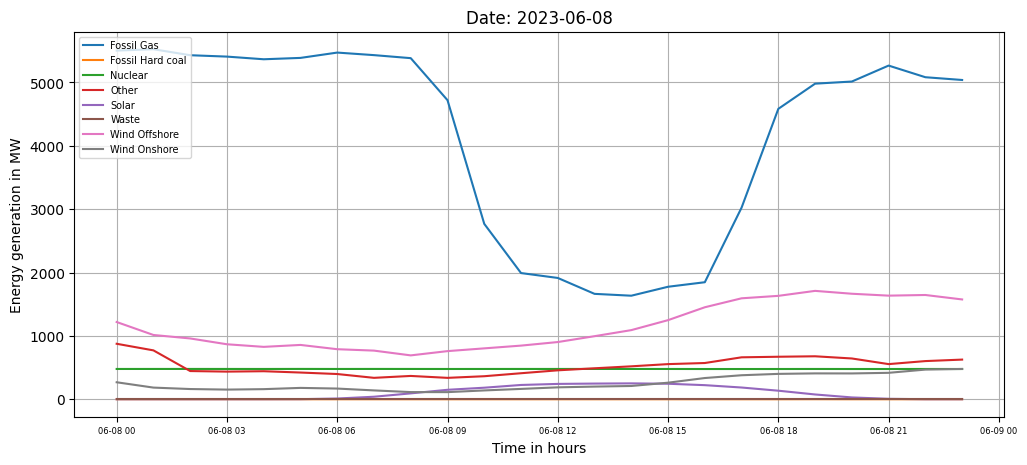

In [81]:
#Getting all dates in the dataset
dates = list(set(df_main.index.date.tolist()))
dates = [str(date) for date in dates]
random.seed(102)

#Sampling 10 different dates from the dataset
date_to_validate = random.sample(dates,k=10)

#Looping through sampled date
for d in date_to_validate:
    plot_data = df_main[df_main.index.date == datetime.datetime.strptime(d, '%Y-%m-%d').date()] #Slicing rows based on the sampled date
    plot_data = plot_data.resample('H').mean() #Resampling to smoothen the curve
    plt.figure(figsize=(12,5))
    plt.plot(plot_data)
    plt.legend(labels, fontsize="7", loc ="upper left")
    plt.title(f'Date: {d}')
    plt.xlabel('Time in hours',fontsize = 10)
    plt.ylabel('Energy generation in MW')
    plt.tick_params(axis='x', labelsize=6)  # Adjust the fontsize as needed
    plt.grid(True)
    plt.show()

<div class='alert alert-warning' role='alert'>
The performance of energy resources is evaluated across 10 randomly selected days to avoid the bias in date selection. This acts as a approximation for the population. Based on the trends we have observed in the sampled 10 values, Fossil gas experiences notable fluctuations in energy generation during the day, exhibiting significant variability. Fossil hard coal exhibits variability on certain days, while maintaining consistent behavior on others. Energy generation from onshore and offshore wind sources, as well as the ‘Others’ category, shows variability throughout the day. The fluctuations in wind source generation may be attributed to changes in wind speed levels throughout the day and across different days. Plus, since the ‘Others’ category is a combination of different sources, it logically exhibits different behaviors throughout the day and across different days.
Conversely, nuclear energy generation remains consistently stable throughout almost all evaluated days. Waste energy generation is consistently low and steady. Solar energy generation maintains a constant level throughout the day, remaining near zero. It's worth noting that this minimal generation occurs only during daylight hours due to the presence of sunlight.

</div>

<h5> E. Are the energy sources correlated with each other and with different time units (e.g. month, day...)? <h5>

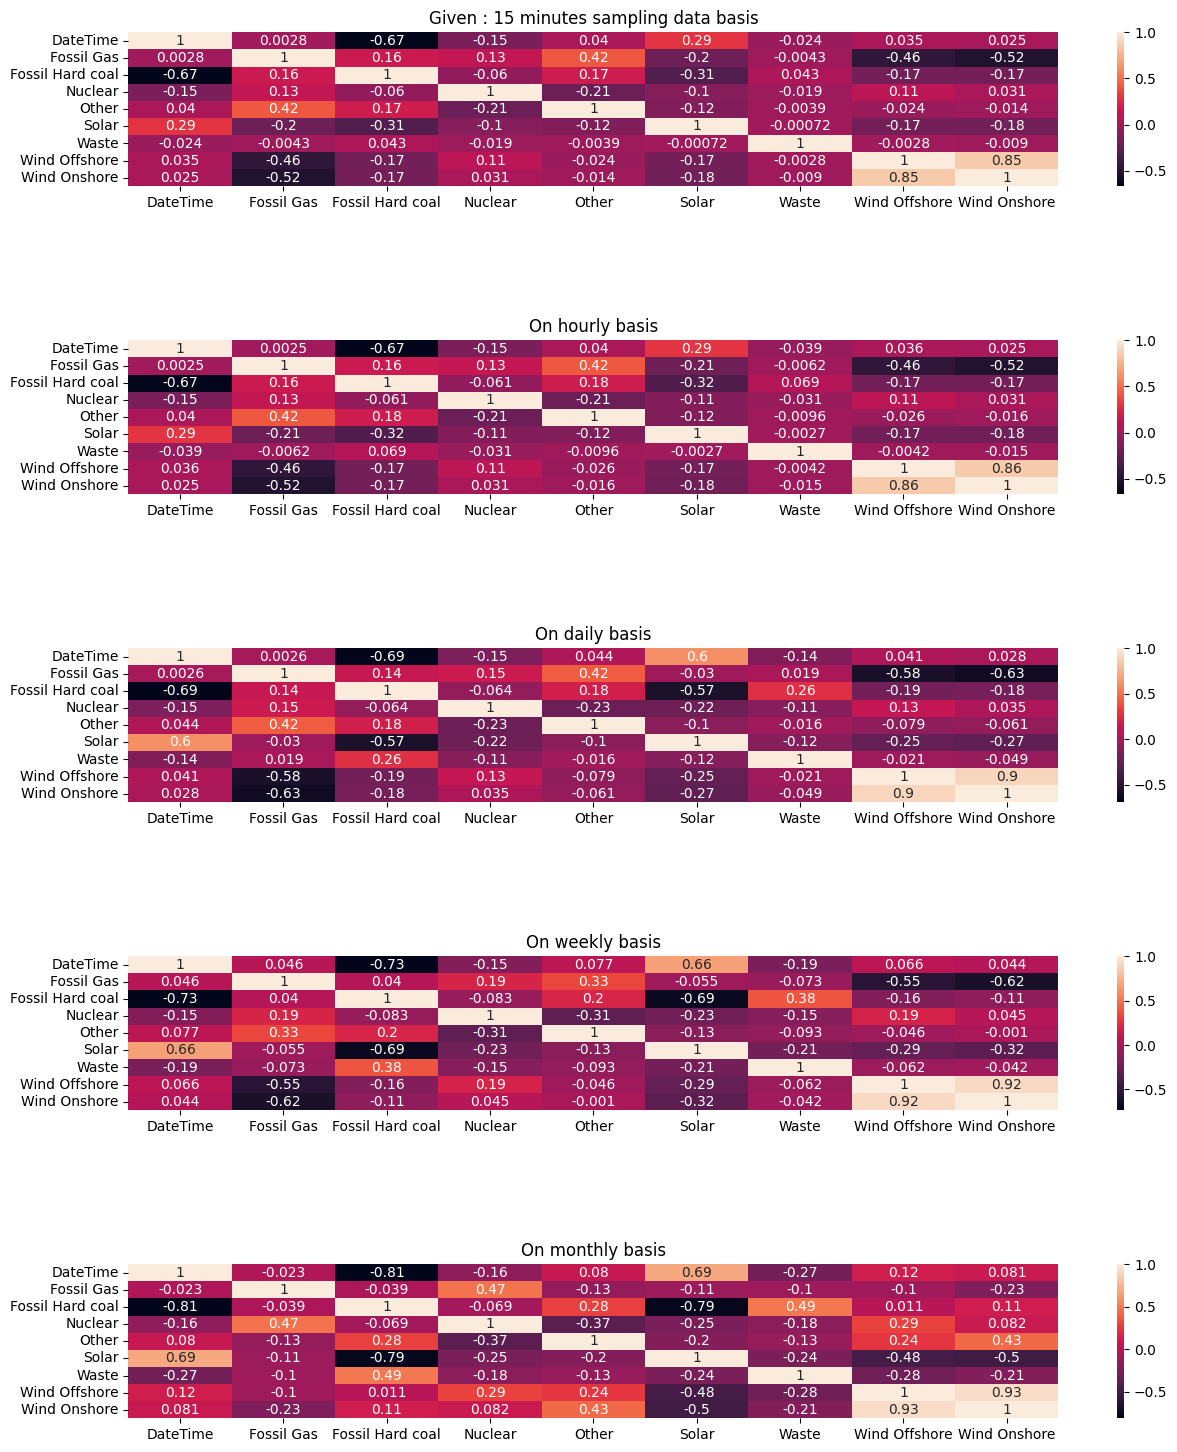

In [82]:
#Computing if energy data is correlated with each other for different data distributions

#Getting data in its given state (15 minutes once)
df_given = df_main.copy()
df_given.reset_index(inplace=True)

#Getting data in Hour basis
aggregate_hour = df_main.resample('H').mean()
aggregate_hour.reset_index(inplace=True)

#Getting data in day basis
aggregate_day = df_main.resample('D').mean()
aggregate_day.reset_index(inplace=True)

#Getting data in Week basis
aggregate_week = df_main.resample('W').mean()
aggregate_week.reset_index(inplace=True)

#Getting data in Month basis
aggregate_month = df_main.resample('M').mean()
aggregate_month.reset_index(inplace=True)

# Initialising the subplot function 
figure, axis = plt.subplots(5,1,figsize=(15,18),gridspec_kw={'hspace': 1}) 

#Graph1
dataplot1 = sns.heatmap(df_given.corr(), annot=True, ax=axis[0])
axis[0].set_title('Given : 15 minutes sampling data basis')

#Graph2
dataplot1 = sns.heatmap(aggregate_hour.corr(), annot=True, ax=axis[1])
axis[1].set_title('On hourly basis')

#Graph3
dataplot2 = sns.heatmap(aggregate_day.corr(), annot=True, ax=axis[2]) 
axis[2].set_title('On daily basis')

#Graph4
dataplot2 = sns.heatmap(aggregate_week.corr(), annot=True, ax=axis[3]) 
axis[3].set_title('On weekly basis')

#Graph5
dataplot3 = sns.heatmap(aggregate_month.corr(), annot=True, ax=axis[4])
axis[4].set_title('On monthly basis')

plt.show()

<div class='alert alert-warning' role='alert'>  

The correlation between the energy sources and time units increases as the time units increase from hour to daily to weekly to monthly. The heatmaps reveal a consistent strong positive correlation between wind offshore and wind onshore across all time units. This confirms the similarity observed in their generation trends highlighted in exercises C. Additionally, solar and fossil hard coal demonstrate a significant negative correlation as the time unit inreases starting from -0.31 in the given date(15 minutes sampled data) to -0.79 in Monthly resampled time unit. An inverse relation could be seen where both wind offshore and onshore have strong negative correlation with Fossil gas in hourly,daily,weekly and no considerate correlation in Monthly basis. However, other energy sources do not display notably strong negative or positive correlations across different time units. Nevertheless, some sources exhibit a moderately strong correlation. For example, wind onshore and fossil gas display a moderately strong negative correlation on an hourly and daily basis. The coefficients are -0.52 and -0.62, respectively.

</div>